Load the Libraries

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt




Create auto generated data

In [2]:
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X
Y = func + 0.4 * torch.randn(X.size())
 


Look at the shape of the data

In [3]:
print("X.shape: ", X.shape)
print("Y.shaoe: ", Y.shape)

X.shape:  torch.Size([100, 1])
Y.shaoe:  torch.Size([100, 1])


These are tensors with 100 rows and 1 column each. 

In [4]:
#Usual first step is to try to visualize the data

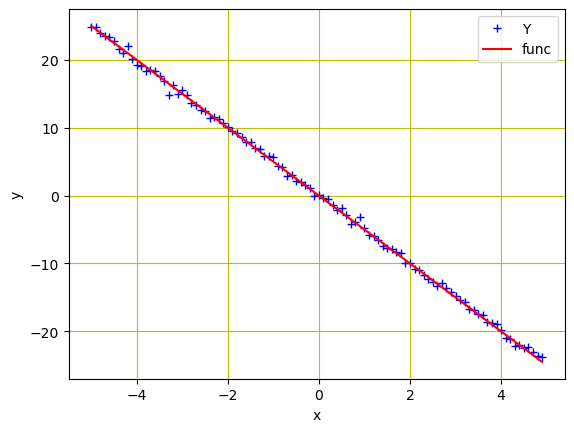

In [5]:
plt.plot(X.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()


Create the model and cost function

In [7]:
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

#Model
def forward(x):
    return w * x + b

def cost(y_pred, y):
    return torch.mean((y_pred - y) ** 2)



Now Set up the learning rate and the number of epochs

In [8]:
#learning rate
lr  = 0.1
#arrat to keep loss after each iteration
loss_list = []
# number of iterations
epochs = 20

Now we do a standar PyTorch training loop

In [9]:
for i  in range(epochs):
    # Make predictions for the all the examples in X (vectorization)
    Y_pred = forward(X)
    # now calculate the loss 
    loss = cost(Y_pred, Y)
    #append the lost to the list
    loss_list.append(loss.item())
    #back propagation step
    loss.backward()
    #parameter update
    w.data = w.data - lr * w.grad.data
    b.data = b.data - lr * b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()
    # print diagnostic data
    print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))



0, 	601.871337890625, 	-1.8233509063720703, 	-16.043771743774414
1, 	346.45294189453125, 	-7.237614154815674, 	-12.797022819519043
2, 	204.5301971435547, 	-3.5938327312469482, 	-10.253766059875488
3, 	123.2836685180664, 	-5.998802661895752, 	-8.182723045349121
4, 	75.54861450195312, 	-4.373977184295654, 	-6.549938201904297
5, 	46.89374923706055, 	-5.441408157348633, 	-5.227462291717529
6, 	29.397319793701172, 	-4.716207027435303, 	-4.1801557540893555
7, 	18.574058532714844, 	-5.1894426345825195, 	-3.3350586891174316
8, 	11.813467025756836, 	-4.865344047546387, 	-2.6637134552001953
9, 	7.560477256774902, 	-5.074803829193115, 	-2.123396158218384
10, 	4.871260166168213, 	-4.929691314697266, 	-1.693237066268921
11, 	3.164625644683838, 	-5.02217960357666, 	-1.347658634185791
12, 	2.0787580013275146, 	-4.957034111022949, 	-1.0721207857131958
13, 	1.3866069316864014, 	-4.997730731964111, 	-0.8510389924049377
14, 	0.9448553323745728, 	-4.968375205993652, 	-0.674580454826355
15, 	0.662663221359

Finally Plot the loss after each iteration

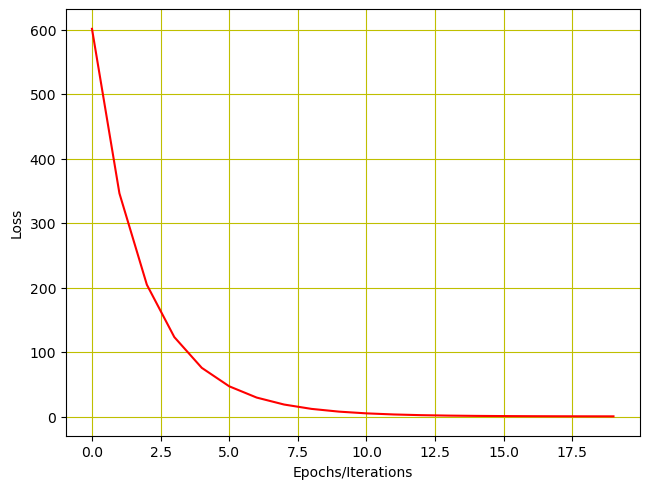

In [10]:
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()